In [316]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm
from scipy.optimize import fsolve
from  scipy import interpolate
from py_vollib_vectorized.models import vectorized_black_scholes
from py_vollib_vectorized.api import get_all_greeks
from py_vollib_vectorized.implied_volatility import vectorized_implied_volatility
from py_vollib_vectorized.api import price_dataframe
from statsmodels.tsa.stattools import adfuller

import statsmodels.tsa.api as tsa
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, q_stat, adfuller
from scipy.stats import probplot, moment

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

%matplotlib inline
# %matplotlib widget

In [317]:
def plot_correlogram(x, lags=None, title=None):
    lags = min(10, int(len(x)/5)) if lags is None else lags
    with sns.axes_style('whitegrid'):
        fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))
        x.plot(ax=axes[0][0], title='Residuals')
        x.rolling(21).mean().plot(ax=axes[0][0], c='k', lw=1)
        q_p = np.max(q_stat(acf(x, nlags=lags), len(x))[1])
        stats = f'Q-Stat: {np.max(q_p):>8.2f}\nADF: {adfuller(x)[1]:>11.2f}'
        axes[0][0].text(x=.02, y=.85, s=stats, transform=axes[0][0].transAxes)
        probplot(x, plot=axes[0][1])
        mean, var, skew, kurtosis = moment(x, moment=[1, 2, 3, 4])
        s = f'Mean: {mean:>12.2f}\nSD: {np.sqrt(var):>16.2f}\nSkew: {skew:12.2f}\nKurtosis:{kurtosis:9.2f}'
        axes[0][1].text(x=.02, y=.75, s=s, transform=axes[0][1].transAxes)
        plot_acf(x=x, lags=lags, zero=False, ax=axes[1][0])
        plot_pacf(x, lags=lags, zero=False, ax=axes[1][1])
        axes[1][0].set_xlabel('Lag')
        axes[1][1].set_xlabel('Lag')
        fig.suptitle(title, fontsize=14)
        sns.despine()
        fig.tight_layout()
        fig.subplots_adjust(top=.9)

In [318]:
S = 100
K = [65,135]
t = 1/3600
r = 0
flag = ['c', 'p']
sigma = [6.40976207, 2.65251273]
get_all_greeks(flag, S, K, t, r, sigma, model='black_scholes', return_as='dict')

{'delta': [0.9999780424248428, -0.9999999999941167],
 'gamma': [8.853575650391576e-06, 0.0],
 'theta': [-5.3204201726941847e-05, -4.121147867408581e-12],
 'rho': [0.00018054930845323724, -0.00037499999999823785],
 'vega': [1.5765114511623324e-06, 7.638334409421077e-13]}

In [319]:
S = 100.36100973076621
K = [65,135]
t = 11/600
r = 0
flag = ['c', 'p']
sigma = [1.89606749, 0.74278823]
get_all_greeks(flag, S, K, t, r, sigma, model='black_scholes', return_as='dict')

{'delta': [0.9656486632678707, -0.998121051812717],
 'gamma': [0.0029532449730140797, 0.000593498867829112],
 'theta': [-0.13552789671889087, -0.0033384190059848606],
 'rho': [0.011214168118559797, -0.02471641130001956],
 'vega': [0.010340075839657459, 0.0008152744968121794]}

In [320]:
df = pd.DataFrame()

df['Flag'] = ['c', 'p','c','p']

df['S'] = 100

df['K'] = [65, 135,65,135]

df['T'] = 1/600

df['R'] = 0

df['IV'] = [6.40976207, 2.65251273,6.40976207, 2.65251273]
df

# price_dataframe(df, flag_col='Flag', underlying_price_col='S', strike_col='K', annualized_tte_col='T', riskfree_rate_col='R', sigma_col='IV', model='black_scholes', inplace=False)

,Flag,S,K,T,R,IV
0,c,100,65,0.001667,0,6.409762
1,p,100,135,0.001667,0,2.652513
2,c,100,65,0.001667,0,6.409762
3,p,100,135,0.001667,0,2.652513


In [321]:
df = pd.read_csv("../data/training_pricepaths.csv", index_col=0)
df.head()

,underlying,call65,call70,call75,call80,call85,call90,call95,call100,call105,...,put90,put95,put100,put105,put110,put115,put120,put125,put130,put135
0,100.000000,35.436537,30.436449,25.465460,20.544501,15.718957,11.091298,6.883928,3.493461,1.333979,...,1.091298,1.883928,3.493461,6.333979,10.375479,15.090290,20.025352,25.011182,30.008593,35.010526
1,99.703351,35.117638,30.116325,25.143759,20.221087,15.395046,10.773197,6.591873,3.268877,1.212482,...,1.069846,1.888522,3.565526,6.509131,10.632709,15.380026,20.322307,25.309459,30.307651,35.311125
2,99.781739,35.246585,30.252950,25.291467,20.385660,15.585513,11.000335,6.856841,3.536347,1.409663,...,1.218595,2.075101,3.754608,6.627924,10.649909,15.334966,20.254847,25.235405,30.231430,35.233703
3,99.989922,35.412877,30.423416,25.464844,20.560375,15.759372,11.169538,7.013417,3.664809,1.492569,...,1.179616,2.023495,3.674888,6.502648,10.479730,15.139596,20.050467,25.028339,30.023364,35.024824
4,99.348765,34.765348,29.783212,24.834189,19.944124,15.167839,10.623611,6.550014,3.329964,1.305116,...,1.274847,2.201250,3.981199,6.956351,11.042635,15.753561,20.681516,25.664342,30.660513,35.661443


<Axes: >

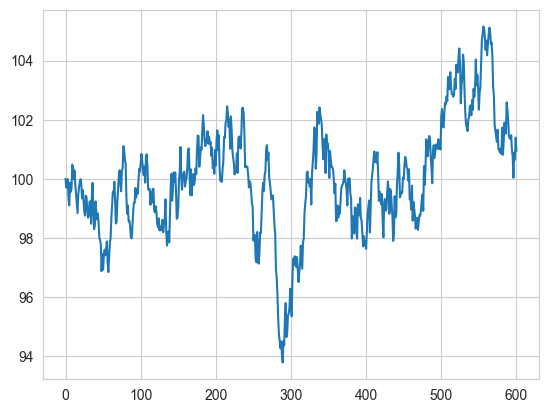

In [322]:
df['underlying'].plot()

<Axes: >

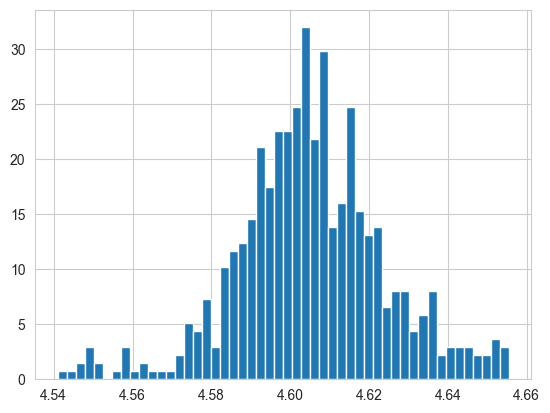

In [323]:
np.log(df['underlying']).hist(bins=50,density=True)

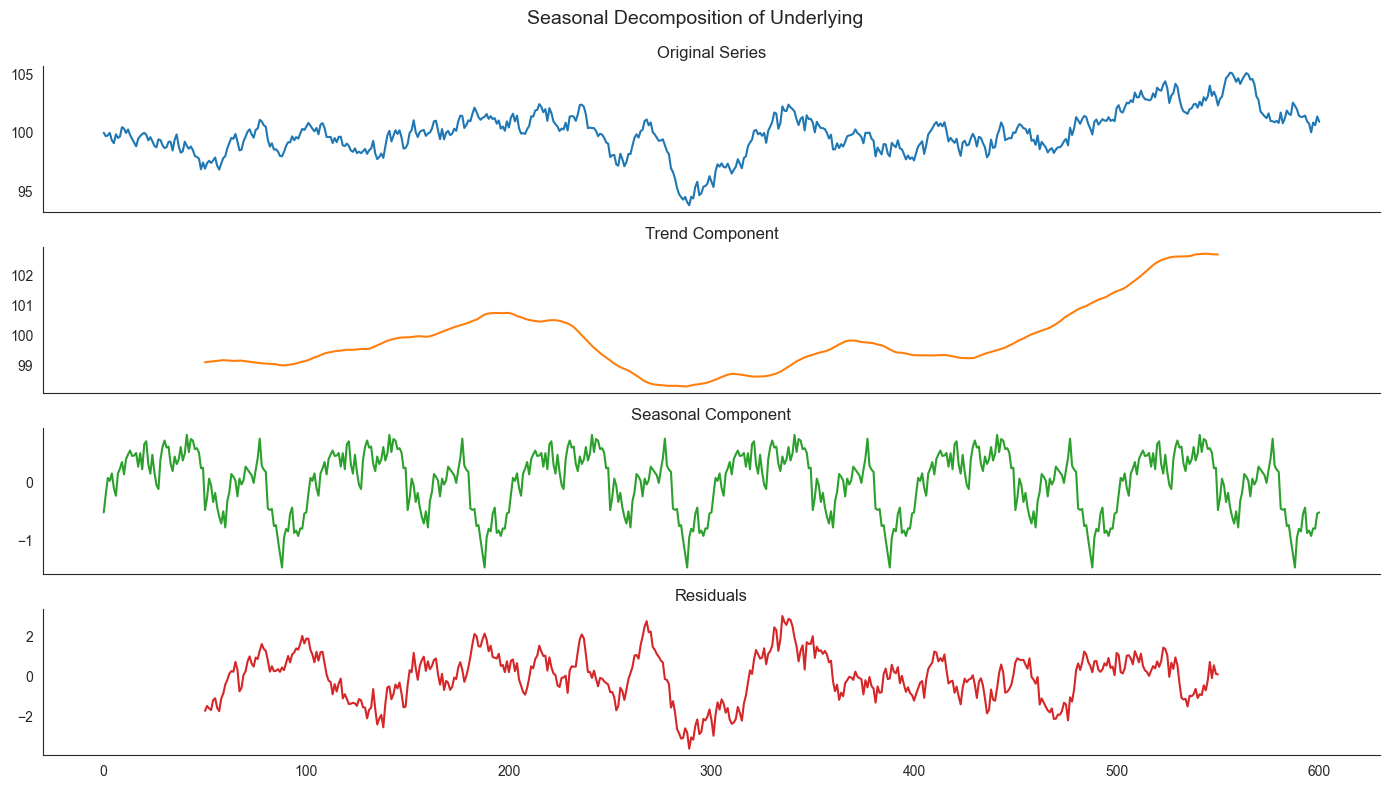

In [324]:
df_underlying = df[['underlying']]
components_underlying = tsa.seasonal_decompose(df_underlying['underlying'], model='additive', period=100)
ts_pearls = (df_underlying['underlying'].to_frame('Original')
      .assign(Trend=components_underlying.trend)
      .assign(Seasonality=components_underlying.seasonal)
      .assign(Residual=components_underlying.resid))
with sns.axes_style('white'):
    ts_pearls.plot(subplots=True, figsize=(14, 8), title=['Original Series', 'Trend Component', 'Seasonal Component','Residuals'], legend=False)
    plt.suptitle('Seasonal Decomposition of Underlying', fontsize=14)
    sns.despine()
    plt.tight_layout()
    plt.subplots_adjust(top=.91);

In [325]:
pd.DataFrame(components_underlying.seasonal).idxmin()

seasonal    88
dtype: int64

c:\Users\redce\Documents\cs-stuff\uchicago-trading-2023\venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


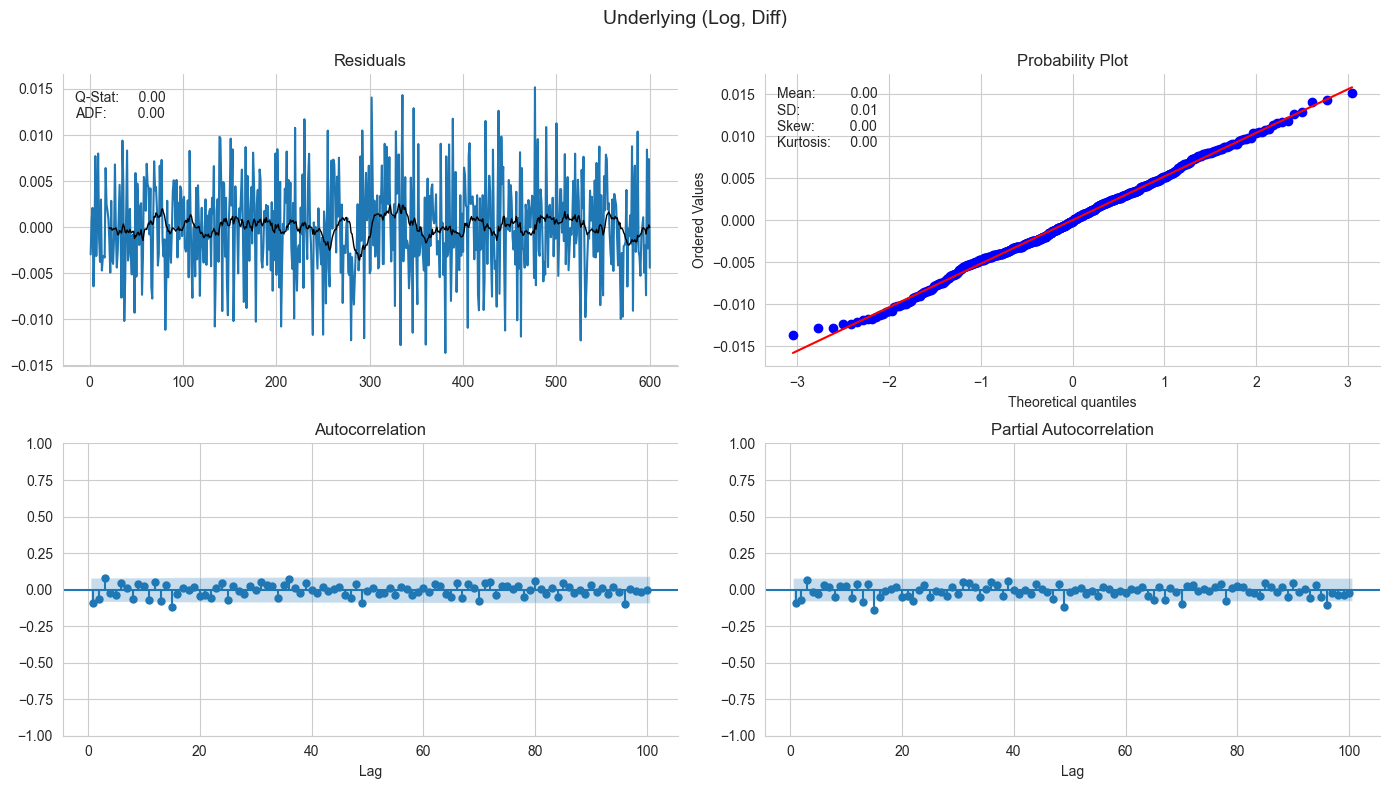

In [326]:
underlying_log = np.log(df_underlying['underlying'])
underlying_log_diff = underlying_log.diff().dropna()

# plot_correlogram(df_underlying['underlying'], lags=100, title='Underlying (Log, Diff)')
plot_correlogram(underlying_log_diff, lags=100, title='Underlying (Log, Diff)')

In [327]:
res = adfuller(df_underlying['underlying'])
 
# Printing the statistical result of the adfuller test
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])
 
# printing the critical values at different alpha levels.
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))

Augmneted Dickey_fuller Statistic: -3.055788
p-value: 0.030003
critical values at different levels:
	1%: -3.441
	5%: -2.866
	10%: -2.569


In [328]:
# size = (5,4)
# for i in df.columns:
#     # df[[i]].plot(figsize=size)
#     df[[i]].hist(figsize=size, bins=50)

In [329]:
df_call65 = df[['underlying','call65']]

In [330]:
df_call65['time_to_expiry'] = np.linspace(0.25,1/12,601)

C:\Users\redce\AppData\Local\Temp\ipykernel_7372\2039022776.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_call65['time_to_expiry'] = np.linspace(0.25,1/12,601)


In [331]:
impl_vol = []
for i in range(len(df_call65)):
    price = df_call65['call65'][i]
    S = df_call65['underlying'][i]
    K = 65
    t = df_call65['time_to_expiry'][i]
    r = 0
    flag = 'c'
    impl_vol.append(vectorized_implied_volatility(price, S, K, t, r, flag, q=0, return_as='numpy')[0])

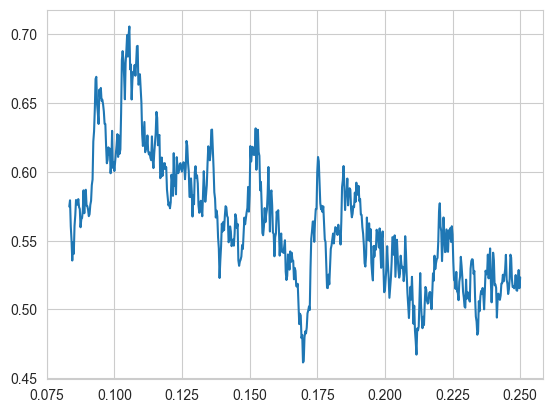

In [332]:
plt.plot(df_call65['time_to_expiry'],impl_vol)

In [333]:
df['time_to_expiry'] = np.linspace(0.25,1/12,601)
impl_vol = np.zeros((len(df),len(range(65,140,5))))

In [334]:
for i in range(len(df)):
    for j in range(65,140,5):
        price = df[f'call{j}'][i]
        S = df['underlying'][i]
        K = j
        t = df['time_to_expiry'][i]
        r = 0
        flag = 'c'
        impl_vol[i][int((j/5) - 13)] = vectorized_implied_volatility(price, S, K, t, r, flag, q=0, return_as='numpy')[0]

In [335]:
impl_df = pd.DataFrame(impl_vol, columns=range(65,140,5))
impl_df

,65,70,75,80,85,90,95,100,105,110,115,120,125,130,135
0,0.523355,0.446913,0.380012,0.322176,0.273039,0.232310,0.199757,0.175192,0.158460,0.149432,0.148000,0.154072,0.167568,0.188423,0.216577
1,0.515440,0.439233,0.372665,0.315283,0.266737,0.226750,0.195102,0.171613,0.156133,0.148541,0.148731,0.156618,0.172124,0.195185,0.225745
2,0.528684,0.452670,0.386174,0.328725,0.279960,0.239593,0.207392,0.183172,0.166779,0.158085,0.156982,0.163379,0.177198,0.198373,0.226844
3,0.520800,0.446925,0.382272,0.326382,0.278899,0.239543,0.208091,0.184361,0.168201,0.159489,0.158119,0.164003,0.177065,0.197238,0.224468
4,0.513607,0.441283,0.377984,0.323251,0.276728,0.238134,0.207243,0.183871,0.167868,0.159107,0.157483,0.162905,0.175297,0.194592,0.220732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,0.535585,0.464772,0.402626,0.348669,0.302531,0.263923,0.232612,0.208408,0.191157,0.180728,0.177014,0.179923,0.189375,0.205302,0.227647
597,0.550550,0.477839,0.414014,0.358593,0.311202,0.271550,0.239404,0.214574,0.196906,0.186270,0.182559,0.185681,0.195558,0.212122,0.235316
598,0.560427,0.485549,0.419852,0.362842,0.314141,0.273448,0.240525,0.215178,0.197249,0.186604,0.183133,0.186743,0.197352,0.214892,0.239303
599,0.579381,0.500437,0.431084,0.370791,0.319150,0.275842,0.240611,0.213251,0.193593,0.181497,0.176844,0.179537,0.189488,0.206627,0.230889


In [339]:
%matplotlib widget

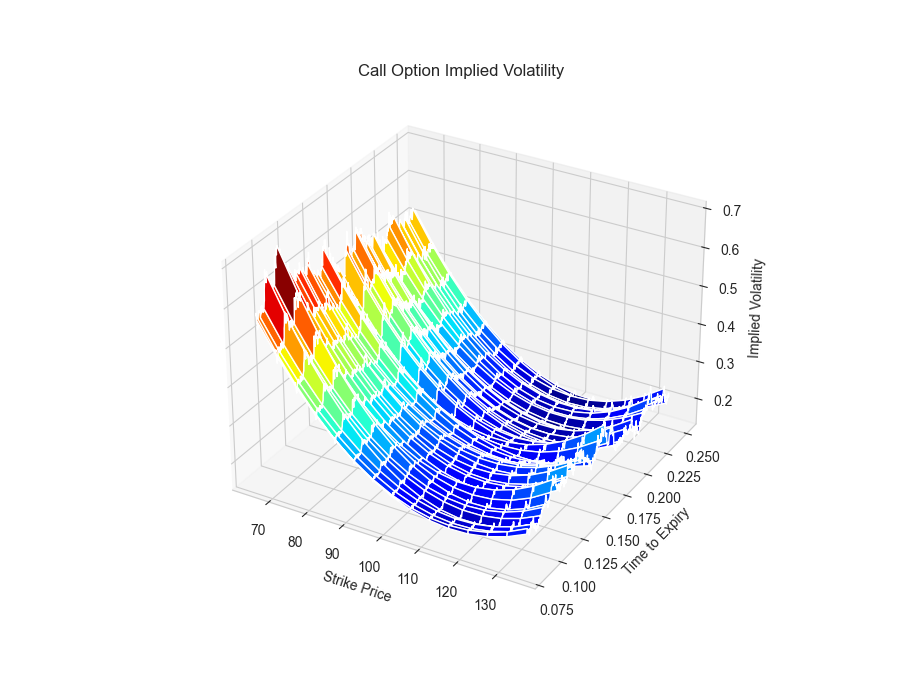

In [340]:
x,y = np.meshgrid(impl_df.columns, df['time_to_expiry'])
# fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')
ax.set_title("Call Option Implied Volatility")
ax.set_ylabel('Time to Expiry')
ax.set_xlabel('Strike Price')
ax.set_zlabel('Implied Volatility')
ax.plot_surface(x, y, impl_df, cmap=plt.cm.jet)

In [338]:
%matplotlib inline